In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


1.14.0


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 5s 0us/step


In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))


Training entries: 25000, labels: 25000


In [8]:
len(train_data[0]), len(train_data[1])


(218, 189)

In [9]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()


1646592/1641221 [==============================] - 1s 1us/step


In [10]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3


In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [12]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [18]:
decode_review(train_data[100])

"<START> i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of <UNK> drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was <UNK> on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep <UNK> the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the <UNK> box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [19]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [20]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [21]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()


W0715 14:25:56.124281 139940392695616 deprecation.py:506] From /home/cabral/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0715 14:25:56.149732 139940392695616 deprecation.py:506] From /home/cabral/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


W0715 15:17:13.248666 139940392695616 deprecation.py:323] From /home/cabral/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 127us/sample - loss: 0.6922 - acc: 0.6227 - val_loss: 0.6903 - val_acc: 0.6921
Epoch 2/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6866 - acc: 0.7021 - val_loss: 0.6821 - val_acc: 0.7502
Epoch 3/40
15000/15000 [==============================] - 1s 60us/sample - loss: 0.6734 - acc: 0.7539 - val_loss: 0.6650 - val_acc: 0.7436
Epoch 4/40
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6497 - acc: 0.7656 - val_loss: 0.6377 - val_acc: 0.7472
Epoch 5/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6147 - acc: 0.7893 - val_loss: 0.6011 - val_acc: 0.7822
Epoch 6/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.5707 - acc: 0.8134 - val_loss: 0.5590 - val_acc: 0.8053
Epoch 7/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.5220 - acc: 0.8313 - val_loss: 0

In [25]:
results = model.evaluate(test_data, test_labels)

print(results)


25000/25000 [==============================] - 1s 29us/sample - loss: 0.3317 - acc: 0.8719
[0.33170233739852906, 0.87192]


In [26]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

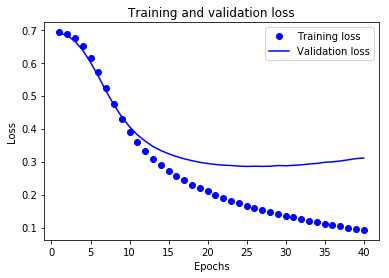

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


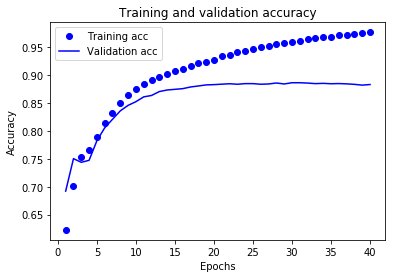

In [28]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
